In [269]:
import pandas as pd
import numpy as np

In [270]:
#Load the data into a pandas dataframe.
df_titanic = pd.read_csv("/content/train.csv")

In [271]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [272]:
df_titanic.shape

(891, 12)

In [273]:
# Data columns
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [274]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [275]:
# to describe of our data
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Cleaning data

In [276]:
# cleaning data
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [277]:
# drop the "Cabin" column from the dataframe
df_titanic = df_titanic.drop(columns='Cabin', axis=1)

In [278]:
# mean value of "Embarked" column
df_titanic['Age'].mean()

29.69911764705882

In [279]:
# filling the missing values in "Age column" with "Mean" value
df_titanic['Age'].fillna(df_titanic['Age'].mean(), inplace=True)

In [280]:
# finding the mode value of "Embarked" column
print(df_titanic['Embarked'].mode())

0    S
dtype: object


In [281]:
print(df_titanic['Embarked'].mode()[0])

S


In [282]:
# replacing the missing values in "Embarked" column with mode value
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace=True)

Data Visualization

In [283]:
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


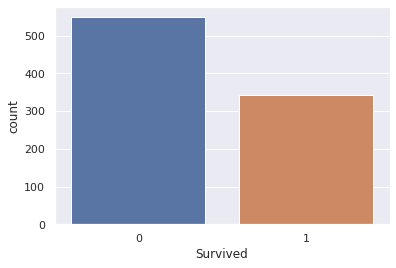

In [285]:
# making a count plot for "Survived" column
sns.countplot('Survived', data=df_titanic)

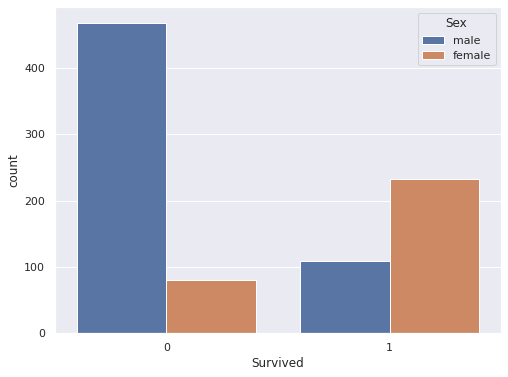

In [286]:
# Survived & Sex
plt.figure(figsize=(8,6))
sns.countplot(x='Survived',hue='Sex',data=df_titanic)
plt.show()

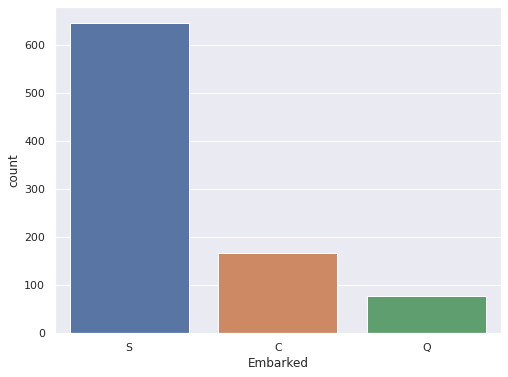

In [287]:
# Embarked column
plt.figure(figsize=(8,6))
sns.countplot(x='Embarked', data=df_titanic)
plt.show()

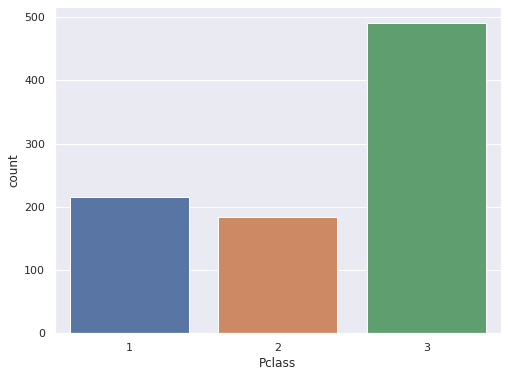

In [288]:
# Pclass column
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', data=df_titanic)
plt.show()

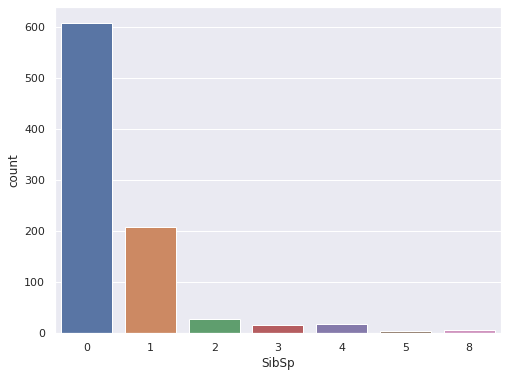

In [289]:
# SibSp column
plt.figure(figsize=(8,6))
sns.countplot(x='SibSp', data=df_titanic)
plt.show()

In [290]:
from sklearn.preprocessing import LabelEncoder

In [291]:
# Label Encoding
encoder = LabelEncoder()

In [292]:
df_titanic['Embarked'] = encoder.fit_transform(df_titanic['Embarked'])
df_titanic['Sex'] = encoder.fit_transform(df_titanic['Sex'])

In [293]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [294]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [295]:
X_feature = df_titanic.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y_feature = df_titanic['Survived']

In [296]:
X_feature.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [297]:
Y_feature

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [298]:
Y_feature.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [299]:
# Splitting Training and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X_feature, Y_feature, test_size = 0.2, random_state=2)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,1,40.000000,0,0,27.7208,0
10,3,0,4.000000,1,1,16.7000,2
873,3,1,47.000000,0,0,9.0000,2
182,3,1,9.000000,4,2,31.3875,2
876,3,1,20.000000,0,0,9.8458,2
...,...,...,...,...,...,...,...
534,3,0,30.000000,0,0,8.6625,2
584,3,1,29.699118,0,0,8.7125,0
493,1,1,71.000000,0,0,49.5042,0
527,1,1,29.699118,0,0,221.7792,2


In [300]:
df_titanic.shape, X_train.shape, X_test.shape

((891, 11), (712, 7), (179, 7))

Model Training

Logistic Regression

In [301]:
model = LogisticRegression()

In [302]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

In [303]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train) 

In [304]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8132022471910112


In [305]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 

In [306]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7877094972067039


Random forest classifier

In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [308]:
rf_model = RandomForestClassifier(n_estimators=100)

In [309]:
# model training
rf_model.fit(X_train,Y_train)

RandomForestClassifier()

In [310]:
#accuracy on training data
X_train_prediction = rf_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [311]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9859550561797753


In [312]:
#accuracy on test data
X_test_prediction = rf_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 

In [313]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8044692737430168


SVC Model

In [314]:
from sklearn.svm import SVC

In [315]:
svc_model = SVC()

In [316]:
 svc_model.fit(X_train,Y_train)

SVC()

In [317]:
#accuracy on training data
X_train_prediction = svc_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [318]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.6797752808988764


In [319]:
#accuracy on test data
X_test_prediction = svc_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 

In [320]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.6368715083798883


Cross Validations Techniques for Training data

K Fold Cross Validation of Logistic Regression

In [321]:
from sklearn.model_selection import KFold
logis_model=LogisticRegression()
kfold_validation=KFold(10)

In [322]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(logis_model,X_feature,Y_feature,cv=kfold_validation)
print(results)
print(np.mean(results))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.77777778 0.82022472 0.7752809  0.7752809  0.7752809  0.7752809
 0.76404494 0.7752809  0.84269663 0.84269663]
0.7923845193508116


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


K Fold Cross Validation of Random Forest Classifier

In [323]:
from sklearn.model_selection import KFold
rf_model = RandomForestClassifier(n_estimators=100)
kfold_validation=KFold(10)

In [324]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(rf_model,X_feature,Y_feature,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.72222222 0.80898876 0.76404494 0.82022472 0.86516854 0.82022472
 0.79775281 0.7752809  0.82022472 0.85393258]
0.8048064918851434


K Fold Cross Validation of SVC

In [325]:
from sklearn.model_selection import KFold
svc_model = SVC()
kfold_validation=KFold(10)

In [326]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(svc_model,X_feature,Y_feature,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.6        0.6741573  0.66292135 0.6741573  0.65168539 0.69662921
 0.65168539 0.73033708 0.73033708 0.69662921]
0.6768539325842697


Test Data

In [327]:
#Load the data into a pandas dataframe.
titanic_test = pd.read_csv("/content/test.csv")

In [328]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [329]:
titanic_test.shape

(418, 12)

In [330]:
# Data columns
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [331]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [332]:
# to describe of our data
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.389952
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.488324
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


Cleaning data

In [333]:
# cleaning data
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [334]:
# drop the "Cabin" column from the dataframe
titanic_test = titanic_test.drop(columns='Cabin', axis=1)

In [335]:
# filling the missing values in "Age column" with "Mean" value
titanic_test['Age'].fillna(titanic_test['Age'].mean(), inplace=True)

In [336]:
# filling the missing values in "Fare column" with "Mean" value
titanic_test['Fare'].fillna(titanic_test['Fare'].mean(), inplace=True)

In [337]:
# cleaning data
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

Data Visualization

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

In [339]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


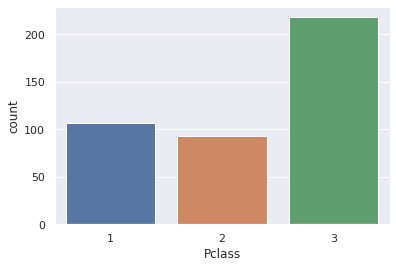

In [340]:
# making a count plot for "Pclass" column
sns.countplot('Pclass', data=titanic_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


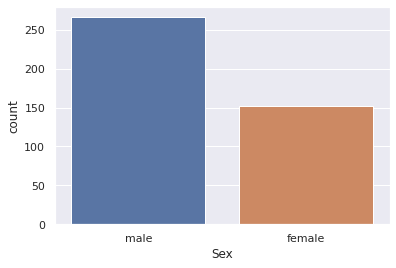

In [341]:
# making a count plot for "Sex" column
sns.countplot('Sex', data=titanic_test)

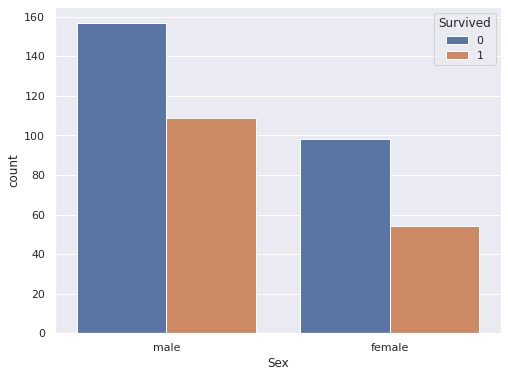

In [342]:
# Sex & Survived
plt.figure(figsize=(8,6))
sns.countplot(x='Sex',hue='Survived',data=titanic_test)
plt.show()

In [343]:
from sklearn.preprocessing import LabelEncoder

In [344]:
# Label Encoding
encoder = LabelEncoder()

In [345]:
titanic_test['Embarked'] = encoder.fit_transform(titanic_test['Embarked'])
titanic_test['Sex'] = encoder.fit_transform(titanic_test['Sex'])

In [346]:
X = titanic_test.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_test['Survived']

In [347]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [348]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
413    0
414    1
415    0
416    1
417    1
Name: Survived, Length: 418, dtype: int64

In [349]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [350]:
# Splitting Training and Test data
# Splitting Training and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
280,3,0,23.00000,0,0,8.6625,2
284,3,0,2.00000,1,1,20.2125,2
40,3,1,39.00000,0,1,13.4167,0
17,3,1,21.00000,0,0,7.2250,0
362,2,0,31.00000,0,0,21.0000,2
...,...,...,...,...,...,...,...
299,3,1,29.00000,0,0,7.8542,2
22,1,0,30.27259,0,0,31.6833,2
72,3,0,29.00000,0,0,7.9250,2
15,2,0,24.00000,1,0,27.7208,0


In [351]:
titanic_test.shape, X_train.shape, X_test.shape

((418, 11), (334, 7), (84, 7))

Model Training

Logistic Regression

In [352]:
model_1 = LogisticRegression()

In [353]:
# training the Logistic Regression model with training data
model_1.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [354]:
#accuracy on training data
X_train_prediction = model_1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [355]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.6077844311377245


In [356]:
#accuracy on test data
X_test_prediction = model_1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 

In [357]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.6190476190476191


Random forest classifier

In [358]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [359]:
rf_model_1 = RandomForestClassifier(n_estimators=100)

In [360]:
# model training
rf_model_1.fit(X_train,Y_train)

RandomForestClassifier()

In [361]:
#accuracy on training data
X_train_prediction = rf_model_1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [362]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9700598802395209


In [363]:
#accuracy on test data
X_test_prediction = rf_model_1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 

In [364]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.5119047619047619


SVC Model

In [365]:
from sklearn.svm import SVC

In [366]:
svc_model_1 = SVC()

In [367]:
 svc_model_1.fit(X_train,Y_train)

SVC()

In [368]:
#accuracy on training data
X_train_prediction = svc_model_1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [369]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.625748502994012


In [370]:
#accuracy on test data
X_test_prediction = svc_model_1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 

In [371]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.5952380952380952


Cross Validations Techniques for Test data

In [372]:
from sklearn.model_selection import KFold
logis_model_1=LogisticRegression()
kfold_validation=KFold(10)

In [373]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(logis_model,X,Y,cv=kfold_validation)
print(results)
print(np.mean(results))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.54761905 0.54761905 0.73809524 0.66666667 0.61904762 0.69047619
 0.52380952 0.45238095 0.56097561 0.6097561 ]
0.5956445993031358


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


K Fold Cross Validation of Random Forest Classifier

In [374]:
from sklearn.model_selection import KFold
rf_model_1 = RandomForestClassifier(n_estimators=100)
kfold_validation=KFold(10)

In [375]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(rf_model,X,Y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.5952381  0.45238095 0.5952381  0.5952381  0.5952381  0.64285714
 0.52380952 0.5        0.43902439 0.58536585]
0.552439024390244


K Fold Cross Validation of SVC model

In [376]:
from sklearn.model_selection import KFold
svc_model_1 = SVC()
kfold_validation=KFold(10)

In [377]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(svc_model,X,Y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.52380952 0.57142857 0.73809524 0.71428571 0.64285714 0.66666667
 0.52380952 0.42857143 0.56097561 0.6097561 ]
0.5980255516840882
